# Radioactive decays

Given N(t) radioactive nuclei, they will decay randomly according to the following equation:

$\frac{dN}{dt} = -\frac{N(t)}{\tau}$.

In this program I will be solving this differential equation numerically by replacing $\frac{dN}{dt}$ with the forward difference $\frac{N(t+h)-N(t)}{h}$.

Given some initial condition for $N(t=0) = N(0)$, we can obtain numerical values of $N(t)$ for all later times. Since, this differential equation can be solved analytically as $N(t) = N(0) e^{-\frac{t}{\tau}}$, we can compare out numerical results with the exact solution.

In the following program, I am solving the differential equation numerically for values $h$ = 1.0s, 0.1s, 0.01s. The variable $h$ represents the differential change in time, so as we decrease the value of $h$, our result should look more similar to the exact solution when we graph it.

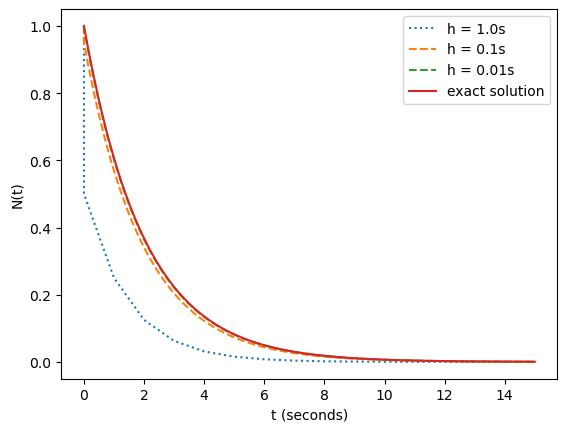

In [19]:
import math
from pylab import plot,show,xlim,ylim,legend,title,xlabel,ylabel
import numpy as np


def N(tMin,tMax,h,tau,initCon):
    n = [initCon]
    t = [tMin]
    index = 0
    
    for i in np.arange(tMin,tMax,h):
        plusH = n[index]*(1-(h/tau))
        n.append(plusH)
        t.append(i)
        index += 1    
    return n,t

Min = 0.0
Max = 15.0
e = np.vectorize(math.exp)
y1,x1 = N(Min,Max,1.0,2,1.0)
y2,x2 = N(Min,Max,0.1,2,1.0)
y3,x3 = N(Min,Max,0.01,2,1.0)
x4 = np.linspace(Min,Max,1000)
y4 = e(-x4/2)


plot(x1,y1, ':',label = 'h = 1.0s')
plot(x2,y2, '--' ,label = 'h = 0.1s')
plot(x3,y3, '--', label = 'h = 0.01s')
plot(x4,y4,'-', label = 'exact solution')
legend(loc = 'upper right')
xlabel('t (seconds)')
ylabel('N(t)')
show()
    

### Time-dependence of N(t) when we change $\tau$

Physically, $\tau$ is the average lifetime of a given radioactive material.

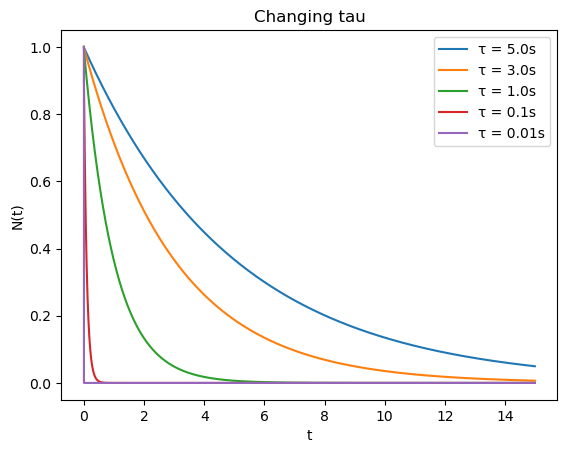

In [22]:
h = 0.01

y1, x1 = N(Min,Max,h,5.0,1)
y2, x2 = N(Min,Max,h,3.0,1)
y3, x3 = N(Min,Max,h,1.0,1)
y4, x4 = N(Min,Max,h,0.1,1)
y5, x5 = N(Min,Max,h,0.01,1)

plot(x1,y1,label = 'τ = 5.0s')
plot(x2,y2,label = 'τ = 3.0s')
plot(x3,y3,label = 'τ = 1.0s')
plot(x4,y4,label = 'τ = 0.1s')
plot(x5,y5,label = 'τ = 0.01s')
legend(loc = 'upper right')
title('Changing tau')
xlabel('t')
ylabel('N(t)')
show()

### Coupled differential equation

Consider now a system of a parent nucleus P and a daughter nucleus D, both radioactive. We can describe their decays with coupled differetial equations:

$\frac{dN_P}{dt} = -\frac{N_P(t)}{\tau_P}$

$\frac{dN_D}{dt} = \frac{N_P(t)}{\tau_P} - \frac{N_D(t)}{\tau_D} $.

In the following program, I am numerically solving the coupled equations and plotting the time dependence of $N_P$ for $\tau_P$ = 2.0s and $N_D$ for $\tau_D$ = 0.02s, 2.0s, 200.0s.

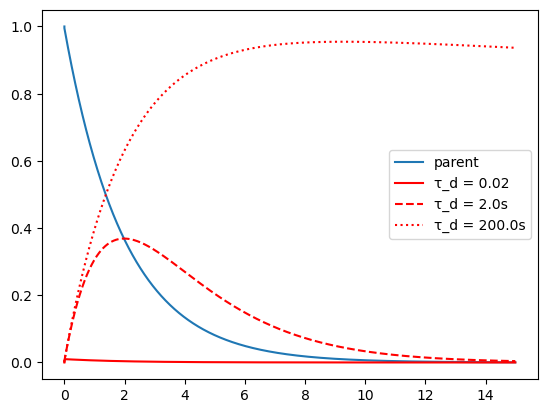

In [52]:
def daughter(tMin,tMax,h,tauP,tauD,p0,d0):
    nD = [d0]
    t = [tMin]
    index = 0
    nP, tP = N(tMin,tMax,h,tauP,p0)
    
    for i in np.arange(tMin,tMax,h):
        plusH = ((h/tauP)*nP[index])+(nD[index]*(1-(h/tauD)))
        nD.append(plusH)
        t.append(i)
        index += 1
        
    return nD,t



yP,xP = N(Min,Max,h,2.0,1)
y1,x1 = daughter(Min,Max,h,2.0,0.02,1,0)
y2,x2 = daughter(Min,Max,h,2.0,2.0,1,0)
y3,x3 = daughter(Min,Max,h,2.0,200.0,1,0)

plot(xP,yP,label = 'parent')
plot(x1,y1,'-r',label = 'τ_d = 0.02')
plot(x2,y2,'--r',label = 'τ_d = 2.0s')
plot(x3,y3,':r',label = 'τ_d = 200.0s')
legend()
show()

